# 1. Import the Necessary Package

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Instantiate the Environment 

In [2]:
from ff_env_discrete import FFEnv, Viewer  # Environemnt

env = FFEnv()
print("State size :", env.state_size)
print("Action size : ", env.action_size)

State size : 7
Action size :  5


# 3. Instantiate the Agent

In [3]:
from dqn_agent import Agent

agent = Agent(state_size=7, action_size=5, seed=0)

# 4. Train the Agent with DQN

In [4]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
        if i_episode >= n_episodes:
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
            
    return scores

scores = dqn()

Episode 100	Average Score: -13154.39
Episode 200	Average Score: -10810.59
Episode 300	Average Score: -7774.914
Episode 400	Average Score: -6452.48
Episode 500	Average Score: -4701.05
Episode 600	Average Score: -3951.98
Episode 700	Average Score: -4020.10
Episode 800	Average Score: -2757.41
Episode 900	Average Score: -2698.90
Episode 1000	Average Score: -2283.82
Episode 1100	Average Score: -2224.71
Episode 1200	Average Score: -2043.13
Episode 1300	Average Score: -2300.66
Episode 1400	Average Score: -2072.12
Episode 1500	Average Score: -2132.32
Episode 1600	Average Score: -1728.03
Episode 1700	Average Score: -2305.10
Episode 1800	Average Score: -2236.08
Episode 1900	Average Score: -1981.11
Episode 2000	Average Score: -2840.65


NameError: name 'scores' is not defined

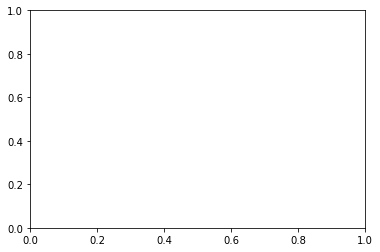

In [4]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# 5. Evaluate

In [4]:

# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth', map_location='cpu'))

for i in range(1):
    state = env.reset()
    for j in range(200):
        action = agent.act(state)
        env.render()
        state, reward, done = env.step(action)
        if done:
            break 
            
#env.close()

obj_center :  276.2499877061721 281.25000333299334 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  274.8427905043354 281.6277309769066 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  273.4337241249159 281.9984250655398 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  272.0228237810079 282.3620760522317 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  270.61011989600956 282.71865769289434 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  269.19564835494384 283.0681602586992 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  267.7794520370662 283.41060811653733 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  266.3615579996258 283.74595793895423 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  264.9420058866963 284.07421697396785 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  263.52083132136613 284.3953755637631 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  262.09806783124804 284.7094246186316 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  260.6737520871684 28

obj_center :  114.44761274447501 218.90457081379282 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  114.44761274447501 218.90457081379282 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  114.44761274447501 218.90457081379282 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  114.44761274447501 218.90457081379282 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  114.44761274447501 218.90457081379282 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  114.44761274447501 218.90457081379282 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  114.44761274447501 218.90457081379282 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  114.44761274447501 218.90457081379282 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  114.44761274447501 218.90457081379282 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  114.44761274447501 218.90457081379282 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  114.44761274447501 218.90457081379282 goal :  {'x': 91, 'y': 215, 'w': 25}
obj_center :  114.447

In [14]:
env.get_goal_point()

(array([-28.]), array([143.]))

In [6]:
state = env.reset()
print(state)

[1.57079637 1.46014261 1.38124994 1.40625002 0.92624994 0.33125002
 0.        ]


In [11]:
action = env.sample_action()
print(action)

4


In [13]:
next_state, reward, done = env.step(action)
print("next_state : ", next_state)
print("reward : ", reward)
print("done : ", done)

-14.312334312097306
next_state :  [1.55934012 1.45014262 1.39780562 1.44287516 0.94280562 0.36787516
 0.        ]
reward :  -14.312334312097306
done :  False
